In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
books = pd.read_csv('./BX-Books.csv', encoding="latin-1", error_bad_lines=False, sep=';')
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('./BX-Users.csv', encoding="latin-1", error_bad_lines=False, sep=';')
users.columns = ['userId', 'location', 'age']

ratings = pd.read_csv('./BX-Book-Ratings.csv', encoding="latin-1", error_bad_lines=False, sep=';')
ratings.columns = ['userId', 'ISBN', 'bookRating']

print(books.shape)
print(users.shape)
print(ratings.shape)

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/home/eder/miniconda3/envs/crm/lib/python3.7/site-packages/IPython/core/in

(271360, 8)
(278858, 3)
(1149780, 3)


In [3]:
books = books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'], axis=1)


In [4]:
pd.set_option('display.max_colwidth', -1)
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

In [5]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [6]:
books.loc[(books.yearOfPublication == 'DK Publishing Inc') | (books.yearOfPublication == 'Gallimard'), :]
books = books.drop([209538, 220731, 221678], axis=0)

In [7]:
books.yearOfPublication = pd.to_numeric(books.yearOfPublication, errors='coerce')

In [8]:
books.loc[(books.yearOfPublication > 2006) | (books.yearOfPublication == 0), 'yearOfPublication']
books.yearOfPublication.fillna(round(books.yearOfPublication.mean()), inplace=True)
books.yearOfPublication = books.yearOfPublication.astype(np.int32)

books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    int32 
publisher            object
dtype: object

In [9]:
users.loc[(users.age > 90) | (users.age < 5), 'age'] = np.nan
users.age = users.age.fillna(users.age.mean()).astype(np.int32)
users.head()

,userId,location,age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34


In [10]:
ratings.head()

,userId,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [11]:
ratings.shape

(1149780, 3)

In [12]:
n_users = users.shape[0]
n_books = books.shape[0]
n_users * n_books

75670070306

In [13]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings_new = ratings_new[ratings_new.userId.isin(users.userId)]
ratings_new.shape

(1031132, 3)

In [14]:
ratings_explicit = ratings_new[ratings_new.bookRating != 0]
ratings_implicit = ratings_new[ratings_new.bookRating == 0]

In [15]:
users_exp_ratings = users[users.userId.isin(ratings_explicit.userId)]
users_imp_ratings = users[users.userId.isin(ratings_implicit.userId)]

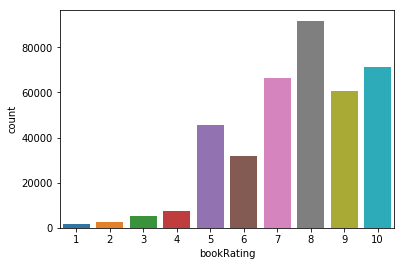

In [16]:
sns.countplot(data=ratings_explicit, x='bookRating')

In [17]:
ratings_count = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['bookRating'].sum())
top10 = ratings_count.sort_values('bookRating', ascending=False).head(10)
top10.merge(books, left_index= True, right_on='ISBN')

,bookRating,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,1999,Arthur A. Levine Books
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
26,2551,0971880107,Wild Animus,Rich Shapero,2004,Too Far
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),Billie Letts,1998,Warner Books
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books
118,2179,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star


In [18]:
counts1 = ratings_explicit['userId'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['userId'].isin(counts1[counts1 >= 100].index)]
counts = ratings_explicit['bookRating'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['bookRating'].isin(counts[counts >= 100].index)]

In [19]:
ratings_explicit.head()

,userId,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9


In [20]:
ratings_matrix = ratings_explicit.pivot(index='userId', columns='ISBN', values='bookRating')
userId = ratings_matrix.index
ISBN = ratings_matrix.columns
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userId,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
from sklearn.neighbors import NearestNeighbors

'''
Roda o KNN sobre a matrix de ratings e retorna os usuários com avaliações mais similares
'''
def find_k_similar_users(user_id, ratings, metric='cosine', k=10):
    similarities = []
    indexes =[]
    model_knn = NearestNeighbors(metric=metric, algorithm='brute')
    model_knn.fit(ratings)
    loc = ratings.index.get_loc(user_id)
    distances, indexes = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors=k+1)
    similarities = 1 - distances.flatten()
    return similarities, indexes


def predict_userbased(user_id, item_id, ratings, metric='cosine', k=10):
    prediction=0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indexes = find_k_similar_users(user_id, ratings, metric, k)
    mean_rating = ratings.iloc[user_loc, :].mean()
    sum_wt = np.sum(similarities)-1
    product = 1
    wtd_sum = 0
    for i in range(0, len(indexes.flatten())):
        if indexes.flatten()[i] == user_loc:
            continue
        else:
            ratings_diff = ratings.iloc[indexes.flatten()[i], item_loc] - np.mean(ratings.iloc[indexes.flatten()[i], :])
            product = ratings_diff * (similarities[i])
            wtd_sum = wtd_sum + product
    predicition = int(round(mean_rating + (wtd_sum/sum_wt)))
    
    if prediction <= 0:
        prediction = 1
    elif prediction > 10:
        prediction = 10
    print('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id, item_id, prediction))
    return prediction

predict_userbased(2276, '0001056107', ratings_matrix)


Predicted rating for user 2276 -> item 0001056107: 1


1

In [25]:
import re
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import os, sys
#This function predicts the rating for specified user-item combination based on item-based approach



@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout



def findksimilaritems(item_id, ratings, metric='cosine', k=10):
    similarities=[]
    indices=[]
    ratings=ratings.T
    loc = ratings.index.get_loc(item_id)
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute')
    model_knn.fit(ratings)
    
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()

    return similarities,indices

def predict_itembased(user_id, item_id, ratings, metric ='cosine', k=10):
    prediction= wtd_sum =0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices=findksimilaritems(item_id, ratings) #similar users based on correlation coefficients
    sum_wt = np.sum(similarities)-1
    product=1
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == item_loc:
            continue;
        else:
            product = ratings.iloc[user_loc,indices.flatten()[i]] * (similarities[i])
            wtd_sum = wtd_sum + product                              
    prediction = int(round(wtd_sum/sum_wt))
    
    #in case of very sparse datasets, using correlation metric for collaborative based approach may give negative ratings
    #which are handled here as below //code has been validated without the code snippet below, below snippet is to avoid negative
    #predictions which might arise in case of very sparse datasets when using correlation metric
    if prediction <= 0:
        prediction = 1   
    elif prediction >10:
        prediction = 10

    print('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))
    
    return prediction
#This function utilizes above functions to recommend items for item/user based approach and cosine/correlation. 
#Recommendations are made if the predicted rating for an item is >= to 6,and the items have not been rated already
def recommendItem(user_id, ratings, metric='cosine'):    
    if (user_id not in ratings.index.values) or type(user_id) is not int:
        print("User id should be a valid integer from this list :\n\n {} ".format(re.sub('[\[\]]', '', np.array_str(ratings_matrix.index.values))))
    else:    
        ids = ['Item-based (correlation)','Item-based (cosine)','User-based (correlation)','User-based (cosine)']
        select = widgets.Dropdown(options=ids, value=ids[0],description='Select approach', width='1000px')
        def on_change(change):
            clear_output(wait=True)
            prediction = []            
            if change['type'] == 'change' and change['name'] == 'value':            
                if (select.value == 'Item-based (correlation)') | (select.value == 'User-based (correlation)') :
                    metric = 'correlation'
                else:                       
                    metric = 'cosine'
                with suppress_stdout():
                    if (select.value == 'Item-based (correlation)') | (select.value == 'Item-based (cosine)'):
                        for i in range(ratings.shape[1]):
                            if (ratings[str(ratings.columns[i])][user_id] !=0): #not rated already
                                prediction.append(predict_itembased(user_id, str(ratings.columns[i]) ,ratings, metric))
                            else:                    
                                prediction.append(-1) #for already rated items
                    else:
                        for i in range(ratings.shape[1]):
                            if (ratings[str(ratings.columns[i])][user_id] !=0): #not rated already
                                prediction.append(predict_userbased(user_id, str(ratings.columns[i]) ,ratings, metric))
                            else:                    
                                prediction.append(-1) #for already rated items
                prediction = pd.Series(prediction)
                prediction = prediction.sort_values(ascending=False)
                recommended = prediction[:10]
                print("As per {0} approach....Following books are recommended...".format(select.value))
                for i in range(len(recommended)):
                     print("{0}. {1}".format(i+1,books.bookTitle[recommended.index[i]].encode('utf-8')))                        
        select.observe(on_change)
        display(select)

recommendItem(4385, ratings_matrix)

Dropdown(description='Select approach', options=('Item-based (correlation)', 'Item-based (cosine)', 'User-base…